In [1]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler


#데이터 분할
from sklearn.model_selection import train_test_split
#LightGBM 패키지 불러오기
from lightgbm import LGBMClassifier

#변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

from subprocess import call
from IPython.display import Image
#로지스틱 회귀
from statsmodels.api import Logit
#분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score,recall_score, f1_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats as stats

from scipy.stats import chi2_contingency

%matplotlib inline
matplotlib.rc('font',family = 'Noto Sans CJK JP')
#-기호 false다
matplotlib.rc('axes',unicode_minus = False)

# 데이터 불러오기

In [3]:
df  = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/SCALE불량.csv", encoding='euc-kr')
df

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [4]:
df.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

# 결측치 없음

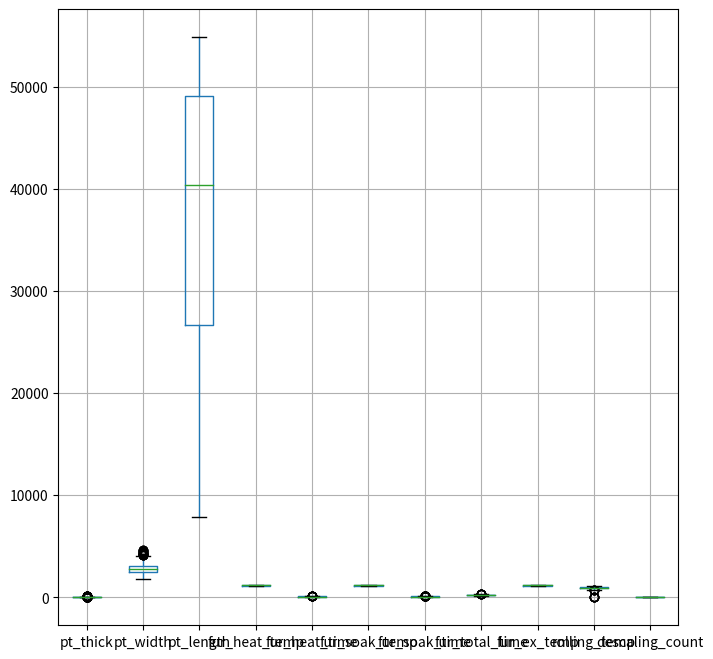

In [6]:
df.iloc[:,1:].boxplot(figsize=(8,8))
plt.show()

Text(0.5, 0, 'descaling_count')

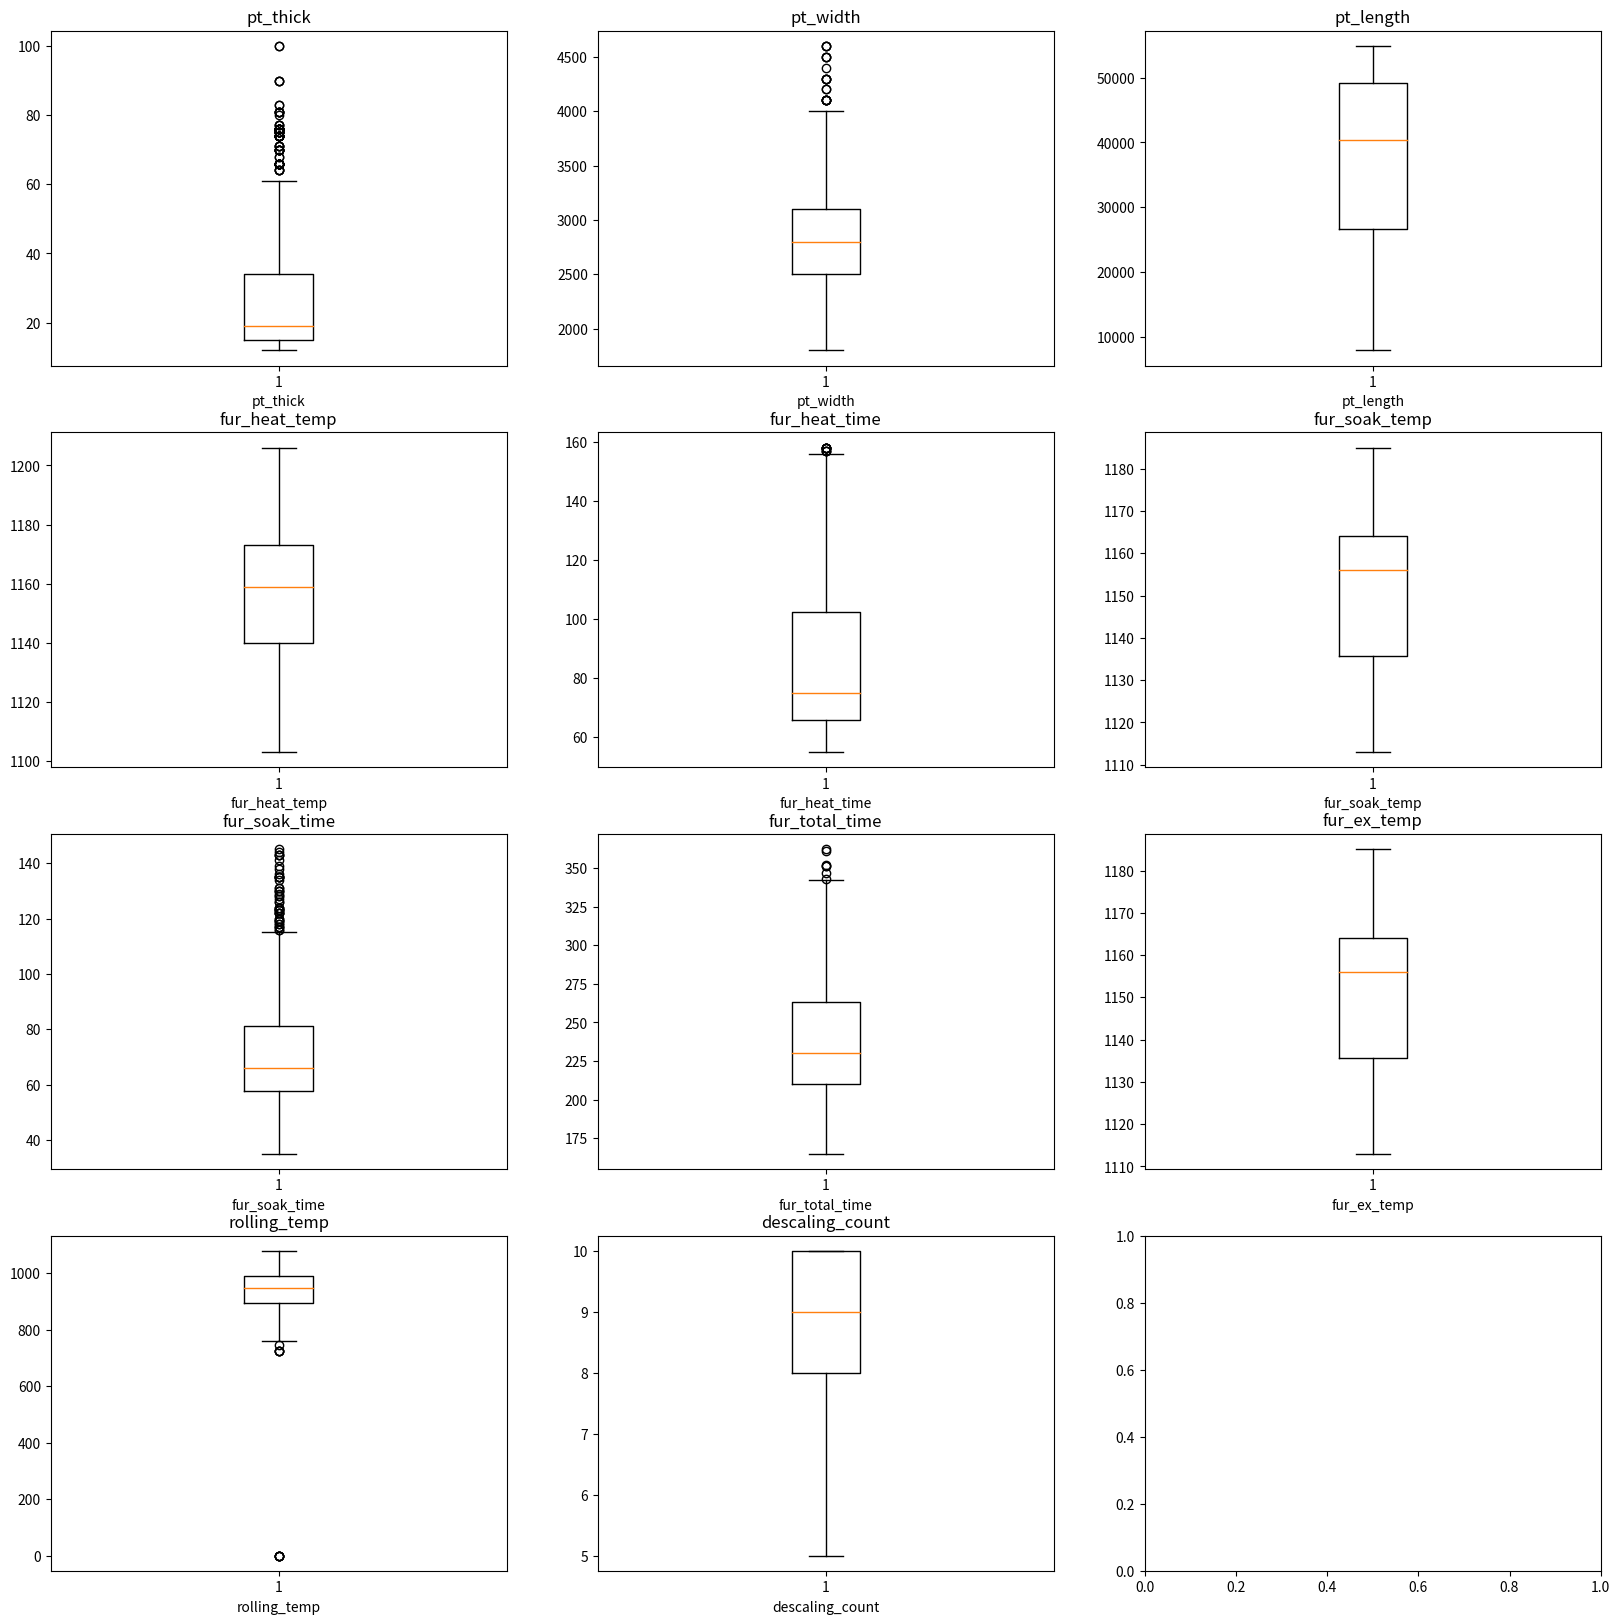

In [7]:
fig, axes = plt.subplots(nrows = 4, ncols =3, figsize = (20,20))
axes[0,0].boxplot(df["pt_thick"])
axes[0,0].set_title("pt_thick")
axes[0,0].set_xlabel("pt_thick")

axes[0,1].boxplot(df["pt_width"])
axes[0,1].set_title("pt_width")
axes[0,1].set_xlabel("pt_width")

axes[0,2].boxplot(df["pt_length"])
axes[0,2].set_title("pt_length")
axes[0,2].set_xlabel("pt_length")

axes[1,0].boxplot(df["fur_heat_temp"])
axes[1,0].set_title("fur_heat_temp")
axes[1,0].set_xlabel("fur_heat_temp")

axes[1,1].boxplot(df["fur_heat_time"])
axes[1,1].set_title("fur_heat_time")
axes[1,1].set_xlabel("fur_heat_time")

axes[1,2].boxplot(df["fur_soak_temp"])
axes[1,2].set_title("fur_soak_temp")
axes[1,2].set_xlabel("fur_soak_temp")

axes[2,0].boxplot(df["fur_soak_time"])
axes[2,0].set_title("fur_soak_time")
axes[2,0].set_xlabel("fur_soak_time")

axes[2,1].boxplot(df["fur_total_time"])
axes[2,1].set_title("fur_total_time")
axes[2,1].set_xlabel("fur_total_time")

axes[2,2].boxplot(df["fur_ex_temp"])
axes[2,2].set_title("fur_ex_temp")
axes[2,2].set_xlabel("fur_ex_temp")

axes[3,0].boxplot(df["rolling_temp"])
axes[3,0].set_title("rolling_temp")
axes[3,0].set_xlabel("rolling_temp")

axes[3,1].boxplot(df["descaling_count"])
axes[3,1].set_title("descaling_count")
axes[3,1].set_xlabel("descaling_count")

이상치 확인해야 하는 변수들<br>
pt_thick<br>
pt_width<br>
fur_heat_time<br>
fur_soak_time<br>
fur_total_time<br>
rolling_temp<br>

In [8]:
df[df['rolling_temp']<=10]

# rolling_temp가 0인 데이터 발견

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
53,PLT_1054,03JAN2023:16:22:29,양품,GL-E36-TM,독일,T,56,3800,11400,적용,...,1132,95,1128,80,244,1128,TMCP(온도제어),0,6,1조
221,PLT_1222,04JAN2023:19:44:09,양품,JS-SM490YB,일본,C,16,2200,43600,적용,...,1163,57,1166,67,228,1166,CR(제어압연),0,10,2조
222,PLT_1223,04JAN2023:19:56:39,양품,JS-SM490YB,일본,C,16,2200,43600,적용,...,1169,64,1164,61,188,1164,CR(제어압연),0,10,2조
598,PLT_1599,07JAN2023:11:40:51,양품,PILAC-BT33,한국,T,81,2100,12900,적용,...,1133,89,1122,59,229,1122,CR(제어압연),0,6,3조
599,PLT_1600,07JAN2023:11:52:00,양품,PILAC-BT33,한국,T,81,2100,13200,적용,...,1130,92,1124,61,210,1124,CR(제어압연),0,6,3조
600,PLT_1601,07JAN2023:11:59:10,양품,NV-D32-TM,영국,T,40,2500,23600,적용,...,1119,109,1117,76,260,1117,TMCP(온도제어),0,6,3조


In [9]:
df=df[df["rolling_temp"] > 10]
df.reset_index(drop=True,inplace=True)
df

# rolling_temp가 0인 데이터 이상치로 판단하고 삭제

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
990,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
991,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
992,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [10]:
df.drop(["plate_no","rolling_date"], axis=1, inplace=True)
df.reset_index(drop=True,inplace=True)
df

# plate_no와 rolling_date는 결과값에 영향이 없는 요인이라 판단하고 변수에서 제외

/tmp/ipykernel_10267/3363118495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["plate_no","rolling_date"], axis=1, inplace=True)


,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,양품,BV-A,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
990,양품,LR-A,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
991,양품,AB/AH32,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
992,양품,NV-A32,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [11]:
df['scale'] = df['scale'].replace({'양품': 1, '불량': 0})
df['scale2'] = df['scale'].replace({'양품': 1, '불량': 0})

df['descaling_count'] = df['descaling_count'].astype('object')
df['scale'] = df['scale'].astype('object')
df['scale2'] = df['scale2'].astype('int64')

/tmp/ipykernel_10267/606668065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scale'] = df['scale'].replace({'양품': 1, '불량': 0})
/tmp/ipykernel_10267/606668065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scale2'] = df['scale'].replace({'양품': 1, '불량': 0})
/tmp/ipykernel_10267/606668065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            994 non-null    object
 1   spec_long        994 non-null    object
 2   spec_country     994 non-null    object
 3   steel_kind       994 non-null    object
 4   pt_thick         994 non-null    int64 
 5   pt_width         994 non-null    int64 
 6   pt_length        994 non-null    int64 
 7   hsb              994 non-null    object
 8   fur_no           994 non-null    object
 9   fur_input_row    994 non-null    object
 10  fur_heat_temp    994 non-null    int64 
 11  fur_heat_time    994 non-null    int64 
 12  fur_soak_temp    994 non-null    int64 
 13  fur_soak_time    994 non-null    int64 
 14  fur_total_time   994 non-null    int64 
 15  fur_ex_temp      994 non-null    int64 
 16  rolling_method   994 non-null    object
 17  rolling_temp     994 non-null    in

In [13]:
continuous_vars = df.select_dtypes(include=['int64'])       # 연속형 데이터
categorical_vars = df.select_dtypes(include=['object'])     # 범주형 데이터

In [14]:
continuous_vars['scale']=continuous_vars['scale2']
continuous_vars.drop("scale2", axis=1, inplace=True)
continuous_vars.reset_index(drop=True,inplace=True)

In [15]:
# 연속형 데이터 확인
continuous_vars.head()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,scale
0,32,3700,15100,1144,116,1133,59,259,1133,934,1
1,32,3700,15100,1144,122,1135,53,238,1135,937,1
2,33,3600,19200,1129,116,1121,55,258,1121,889,1
3,33,3600,19200,1152,125,1127,68,266,1127,885,1
4,38,3100,13300,1140,134,1128,48,246,1128,873,1


In [16]:
# 범주형 데이터 확인
categorical_vars.head()

,scale,spec_long,spec_country,steel_kind,hsb,fur_no,fur_input_row,rolling_method,descaling_count,work_group
0,1,AB/EH32-TM,미국,T,적용,1호기,1열,TMCP(온도제어),8,1조
1,1,AB/EH32-TM,미국,T,적용,1호기,2열,TMCP(온도제어),8,1조
2,1,NV-E36-TM,영국,T,적용,2호기,1열,TMCP(온도제어),8,1조
3,1,NV-E36-TM,영국,T,적용,2호기,2열,TMCP(온도제어),8,1조
4,1,BV-EH36-TM,프랑스,T,적용,3호기,1열,TMCP(온도제어),8,1조


In [17]:
categorical_vars["fur_no_input"] = categorical_vars["fur_no"]+" "+categorical_vars["fur_input_row"]
categorical_vars["fur_no_input"]

categorical_vars.drop(["fur_no","fur_input_row"], axis=1, inplace=True)

df["fur_no_input"] = df["fur_no"]+" "+df["fur_input_row"]
df["fur_no_input"]

df.drop(["fur_no","fur_input_row"], axis=1, inplace=True)

categorical_vars.head()

/tmp/ipykernel_10267/3405559738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fur_no_input"] = df["fur_no"]+" "+df["fur_input_row"]
/tmp/ipykernel_10267/3405559738.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["fur_no","fur_input_row"], axis=1, inplace=True)


,scale,spec_long,spec_country,steel_kind,hsb,rolling_method,descaling_count,work_group,fur_no_input
0,1,AB/EH32-TM,미국,T,적용,TMCP(온도제어),8,1조,1호기 1열
1,1,AB/EH32-TM,미국,T,적용,TMCP(온도제어),8,1조,1호기 2열
2,1,NV-E36-TM,영국,T,적용,TMCP(온도제어),8,1조,2호기 1열
3,1,NV-E36-TM,영국,T,적용,TMCP(온도제어),8,1조,2호기 2열
4,1,BV-EH36-TM,프랑스,T,적용,TMCP(온도제어),8,1조,3호기 1열


Text(0.5, 1.0, 'fur_ex_temp')

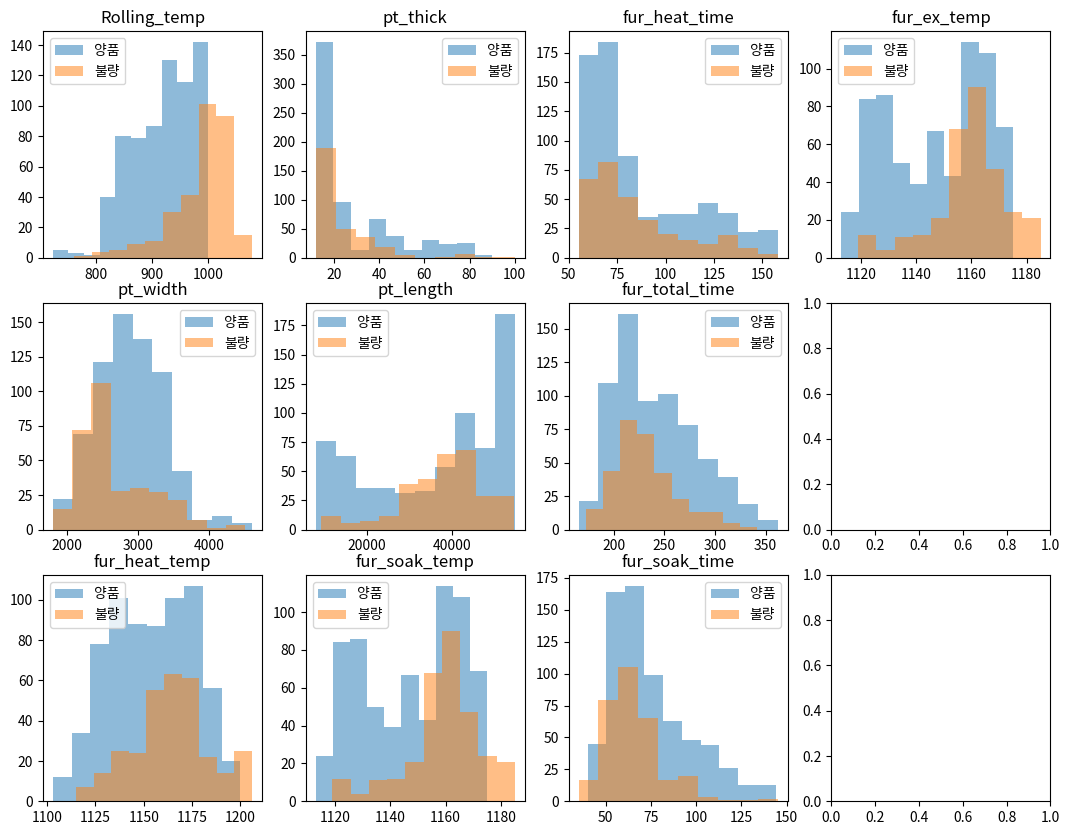

In [18]:
fig, axes = plt.subplots(nrows = 3 , ncols = 4, figsize = (13,10))

axes[0,0].hist(continuous_vars[continuous_vars["scale"] == 1]["rolling_temp"], label="양품", alpha=0.5)
axes[0,0].hist(continuous_vars[continuous_vars["scale"] == 0]["rolling_temp"], label="불량", alpha=0.5)
axes[0,0].legend()
axes[0,0].set_title("Rolling_temp")

axes[0,1].hist(continuous_vars[continuous_vars["scale"] == 1]["pt_thick"], label="양품", alpha=0.5)
axes[0,1].hist(continuous_vars[continuous_vars["scale"] == 0]["pt_thick"], label="불량", alpha=0.5)
axes[0,1].legend()
axes[0,1].set_title("pt_thick")

axes[1,0].hist(continuous_vars[continuous_vars["scale"] == 1]["pt_width"], label="양품", alpha=0.5)
axes[1,0].hist(continuous_vars[continuous_vars["scale"] == 0]["pt_width"], label="불량", alpha=0.5)
axes[1,0].legend()
axes[1,0].set_title("pt_width")

axes[1,1].hist(continuous_vars[continuous_vars["scale"] == 1]["pt_length"], label="양품", alpha=0.5)
axes[1,1].hist(continuous_vars[continuous_vars["scale"] == 0]["pt_length"], label="불량", alpha=0.5)
axes[1,1].legend()
axes[1,1].set_title("pt_length")

axes[2,0].hist(continuous_vars[continuous_vars["scale"] == 1]["fur_heat_temp"], label="양품", alpha=0.5)
axes[2,0].hist(continuous_vars[continuous_vars["scale"] == 0]["fur_heat_temp"], label="불량", alpha=0.5)
axes[2,0].legend()
axes[2,0].set_title("fur_heat_temp")

axes[0,2].hist(continuous_vars[continuous_vars["scale"] == 1]["fur_heat_time"], label="양품", alpha=0.5)
axes[0,2].hist(continuous_vars[continuous_vars["scale"] == 0]["fur_heat_time"], label="불량", alpha=0.5)
axes[0,2].legend()
axes[0,2].set_title("fur_heat_time")

axes[2,1].hist(continuous_vars[continuous_vars["scale"] == 1]["fur_soak_temp"], label="양품", alpha=0.5)
axes[2,1].hist(continuous_vars[continuous_vars["scale"] == 0]["fur_soak_temp"], label="불량", alpha=0.5)
axes[2,1].legend()
axes[2,1].set_title("fur_soak_temp")

axes[2,2].hist(continuous_vars[continuous_vars["scale"] == 1]["fur_soak_time"], label="양품", alpha=0.5)
axes[2,2].hist(continuous_vars[continuous_vars["scale"] == 0]["fur_soak_time"], label="불량", alpha=0.5)
axes[2,2].legend()
axes[2,2].set_title("fur_soak_time")

axes[1,2].hist(continuous_vars[continuous_vars["scale"] == 1]["fur_total_time"], label="양품", alpha=0.5)
axes[1,2].hist(continuous_vars[continuous_vars["scale"] == 0]["fur_total_time"], label="불량", alpha=0.5)
axes[1,2].legend()
axes[1,2].set_title("fur_total_time")

axes[0,3].hist(continuous_vars[continuous_vars["scale"] == 1]["fur_ex_temp"], label="양품", alpha=0.5)
axes[0,3].hist(continuous_vars[continuous_vars["scale"] == 0]["fur_ex_temp"], label="불량", alpha=0.5)
axes[0,3].legend()
axes[0,3].set_title("fur_ex_temp")



temp가 붙은 변수 4개는 온도가 상승할수록 불량률도 상승하는 경향을 보임<br><b>온도와 불량률 비례</b>
<br>fur_soak_temp와 fur_ex_temp의 그래프가 같은 모양을 보이고 있어 추후 등분산성인지 아닌지 어쨌든 검정을 한 이후 컬럼 삭제 예정
<br>Rolling_temp가 제일 중요한 변수

In [19]:
diff = continuous_vars['fur_soak_temp'] - continuous_vars['fur_ex_temp']

if (diff != 0).any():
    print(diff)

# fur_soak_temp와 fur_ex_temp 값 비교

In [20]:
df.drop(["fur_ex_temp"], axis=1, inplace=True)
df.reset_index(drop=True,inplace=True)

/tmp/ipykernel_10267/1091964883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["fur_ex_temp"], axis=1, inplace=True)


fur_soak_temp와 fur_ex_temp의 값이 같으므로 fur_ex_temp 변수 삭제

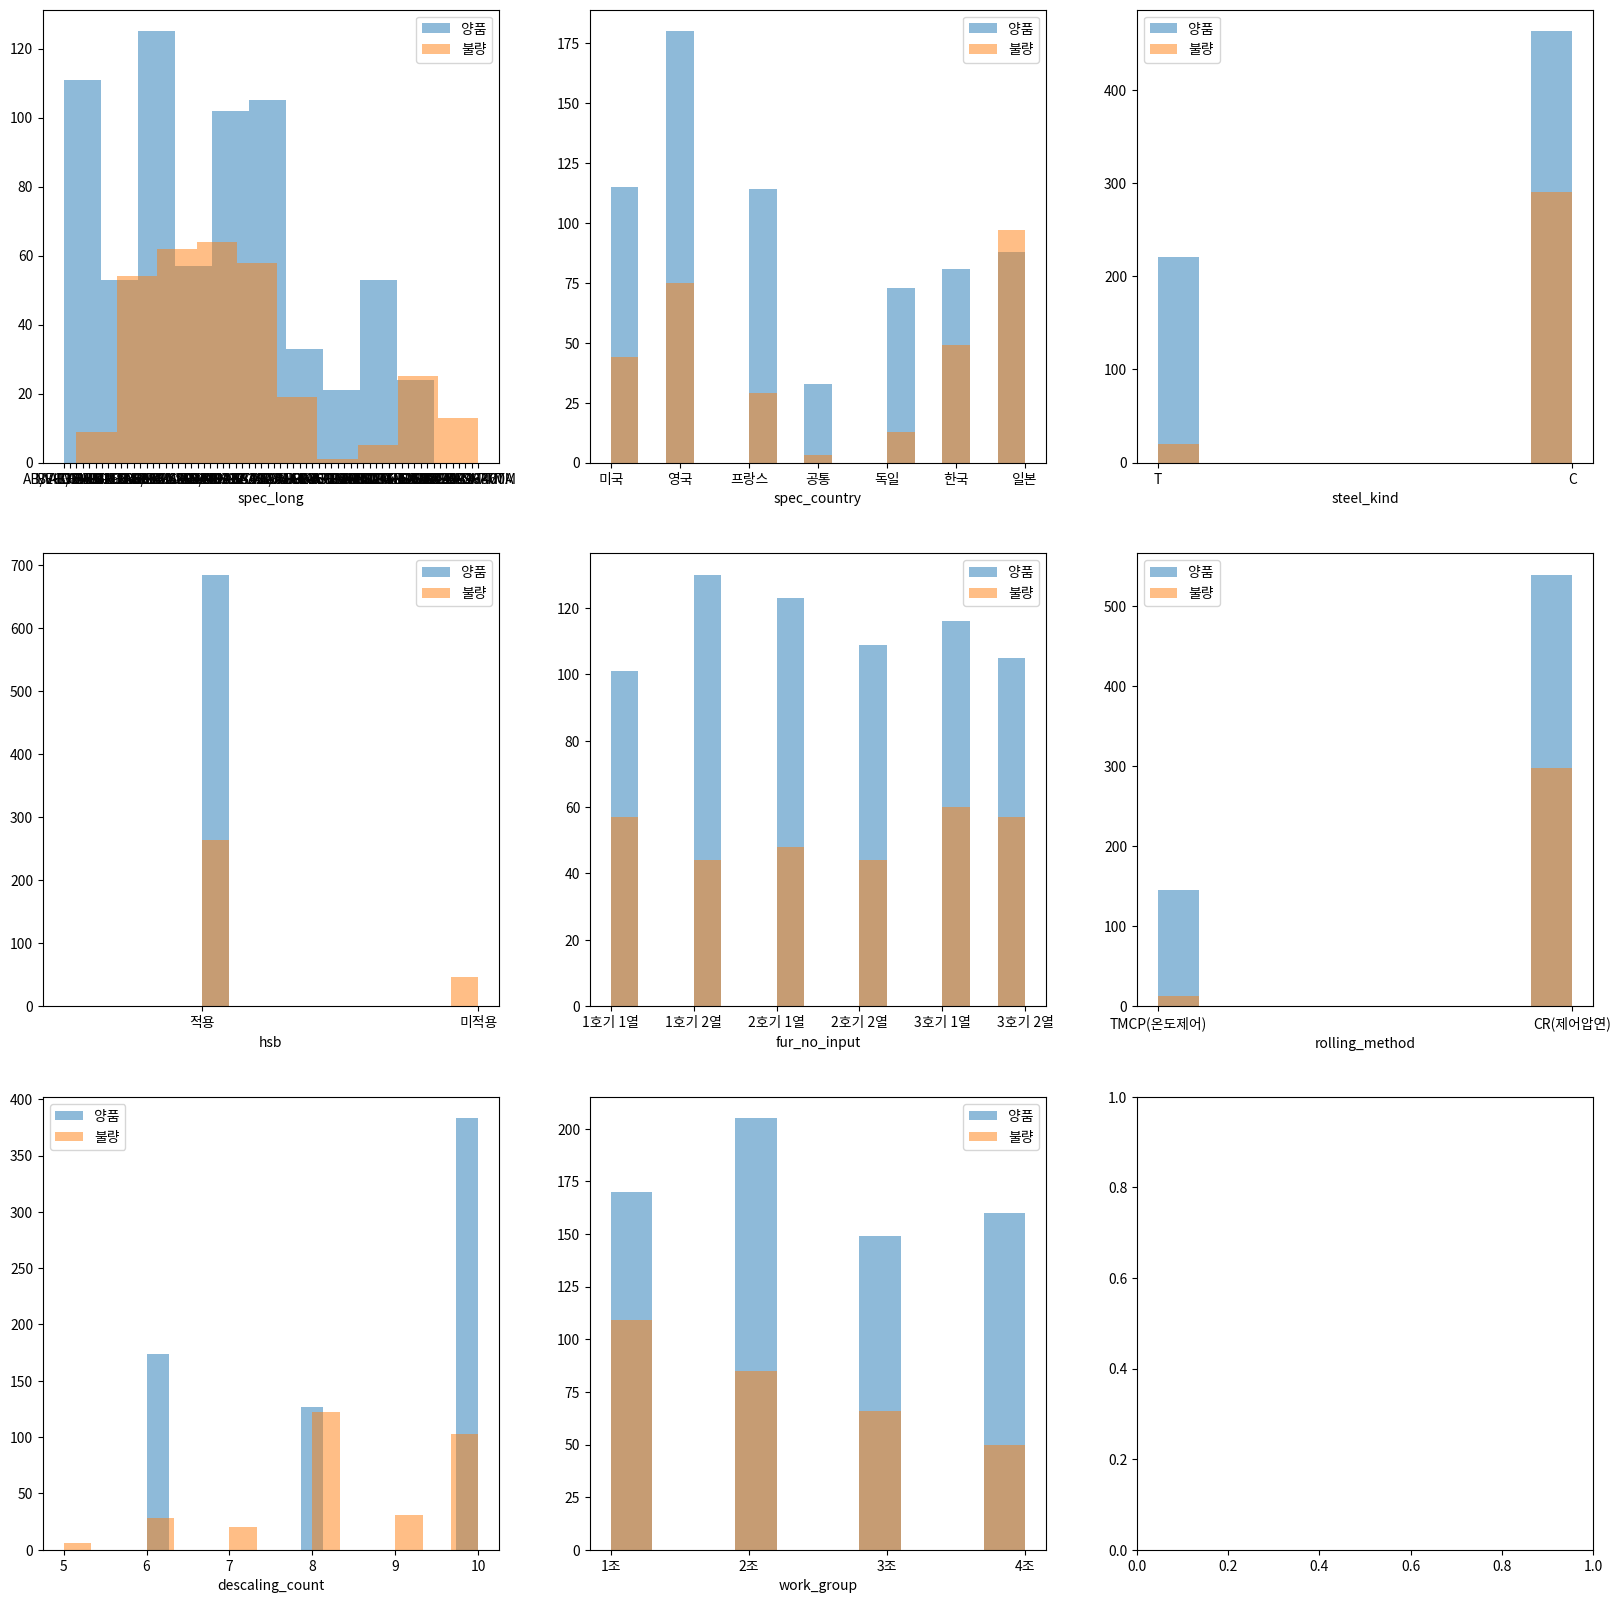

In [21]:
good_products = categorical_vars[categorical_vars["scale"] == 1]
bad_products = categorical_vars[categorical_vars["scale"] == 0]
fig, axes = plt.subplots(nrows = 3, ncols =3, figsize = (20,20))

axes[0,0].hist(good_products["spec_long"], label="양품", alpha=0.5)
axes[0,0].hist(bad_products["spec_long"], label="불량", alpha=0.5)
axes[0,0].set_xlabel("spec_long")
axes[0,0].legend()

axes[0,1].hist(good_products["spec_country"], label="양품", alpha=0.5, bins = 15)
axes[0,1].hist(bad_products["spec_country"], label="불량", alpha=0.5,bins = 15)
axes[0,1].set_xlabel("spec_country")
axes[0,1].legend()

axes[0,2].hist(good_products["steel_kind"], label="양품", alpha=0.5)
axes[0,2].hist(bad_products["steel_kind"], label="불량", alpha=0.5)
axes[0,2].set_xlabel("steel_kind")
axes[0,2].legend()

axes[1,0].hist(good_products["hsb"], label="양품", alpha=0.5)
axes[1,0].hist(bad_products["hsb"], label="불량", alpha=0.5)
axes[1,0].set_xlabel("hsb")
axes[1,0].legend()

axes[1,1].hist(good_products["fur_no_input"], label="양품", alpha=0.5,bins = 15)
axes[1,1].hist(bad_products["fur_no_input"], label="불량", alpha=0.5,bins = 15)
axes[1,1].set_xlabel("fur_no_input")
axes[1,1].legend()


#범주형 그래프 모음집
axes[1,2].hist(good_products["rolling_method"], label="양품", alpha=0.5)
axes[1,2].hist(bad_products["rolling_method"], label="불량", alpha=0.5)
axes[1,2].set_xlabel("rolling_method")
axes[1,2].legend()

axes[2,0].hist(good_products["descaling_count"], label="양품", alpha=0.5,bins = 15)
axes[2,0].hist(bad_products["descaling_count"], label="불량", alpha=0.5,bins = 15)
axes[2,0].set_xlabel("descaling_count")
axes[2,0].legend()

axes[2,1].hist(good_products["work_group"], label="양품", alpha=0.5)
axes[2,1].hist(bad_products["work_group"], label="불량", alpha=0.5)
axes[2,1].set_xlabel("work_group")
axes[2,1].legend()


descaling_count는 7을 경계로 불량이 많아지는것을 볼 수 있음 데이터는 짝수만 있나?<br>
work_group는 1조에서 불량률이 높음 -> 1조(열등조)와 4조(우등조)를 섞어서 근무시킴<br>
rolling_method 는 TMCP는 괜찮고 CR의 경우 영향을 미치는것으로 판단됨<br>
hsb는 시행하지 않을 경우 무조건 불량이 됨<br>
국가 규격(spec_country)의 경우 일본의 불량률이 높지만 규격 자체가 고객의 니즈이므로 불량 요인의 변수라고 보기 어렵다.

In [22]:
pd.crosstab(categorical_vars['scale'], categorical_vars['spec_country'])

spec_country,공통,독일,미국,영국,일본,프랑스,한국
scale,,,,,,,
0,3,13,44,75,97,29,49
1,33,73,115,180,88,114,81


In [23]:
pd.crosstab(categorical_vars['scale'], categorical_vars['hsb'])

# hsb는 시행하지 않을 경우 무조건 불량이 됨

hsb,미적용,적용
scale,,
0,47,263
1,0,684


In [24]:
pd.crosstab(categorical_vars['scale'], categorical_vars['rolling_method'])

# CR의 경우 영향을 미치는것으로 판단됨

rolling_method,CR(제어압연),TMCP(온도제어)
scale,,
0,297,13
1,539,145


In [25]:
pd.crosstab(categorical_vars['scale'], categorical_vars['descaling_count'])

# 7을 경계로 불량이 많아지는것을 볼 수 있음

descaling_count,5,6,7,8,9,10
scale,,,,,,
0,6,28,20,122,31,103
1,0,174,0,127,0,383


In [26]:
pd.crosstab(categorical_vars['scale'], categorical_vars['work_group'])

# 1조에서 불량률이 높음 -> 추후 1조(열등조)와 4조(우등조)를 섞어서 근무시킬 예정

work_group,1조,2조,3조,4조
scale,,,,
0,109,85,66,50
1,170,205,149,160


In [27]:
# 연속형
corr, pval = stats.pearsonr(df['scale'],df['rolling_temp'])
print("Rolling_temp : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()


corr, pval = stats.pearsonr(df['scale'],df['pt_thick'])
print("pt_thick : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()

corr, pval = stats.pearsonr(df['scale'],df['pt_width'])
print("pt_width : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()

corr, pval = stats.pearsonr(df['scale'],df['pt_length'])
print("pt_length : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()


corr, pval = stats.pearsonr(df['scale'],df['fur_heat_temp'])
print("fur_heat_temp : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()

corr, pval = stats.pearsonr(df['scale'],df['fur_heat_time'])
print("fur_heat_time : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()

corr, pval = stats.pearsonr(df['scale'],df['fur_soak_time'])
print("fur_soak_time : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()


corr, pval = stats.pearsonr(df['scale'],df['fur_total_time'])
print("fur_total_time : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()


corr, pval = stats.pearsonr(df['scale'],df['fur_soak_temp'])
print("fur_soak_temp : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()

Rolling_temp : Correlation Analysis
corr:-0.511
p-value:0.000

pt_thick : Correlation Analysis
corr:0.094
p-value:0.003

pt_width : Correlation Analysis
corr:0.194
p-value:0.000

pt_length : Correlation Analysis
corr:-0.049
p-value:0.123

fur_heat_temp : Correlation Analysis
corr:-0.221
p-value:0.000

fur_heat_time : Correlation Analysis
corr:0.036
p-value:0.254

fur_soak_time : Correlation Analysis
corr:0.221
p-value:0.000

fur_total_time : Correlation Analysis
corr:0.129
p-value:0.000

fur_soak_temp : Correlation Analysis
corr:-0.327
p-value:0.000



In [28]:
# 범주형
corr, pval = stats.kendalltau(df['scale'],df['spec_long'])
print("spec_long : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()

corr, pval = stats.kendalltau(df['scale'],df['spec_country'])
print("spec_country : Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print()


corr, pval = stats.kendalltau(df['scale'],df['steel_kind'])
print("steel_kind : Correlation Analysis")
print("corr:{0:.3f}".format(corr))
print('p-value: {0:0.3f}'.format(pval))
print()

corr, pval = stats.kendalltau(df['scale'],df['hsb'])
print("hsb : Correlation Analysis")
print("corr:{0:.3f}".format(corr))
print('p-value: {0:0.3f}'.format(pval))
print()

corr, pval = stats.kendalltau(df['scale'],df['fur_no_input'])
print("fur_no_input : Correlation Analysis")
print("corr:{0:.3f}".format(corr))
print('p-value: {0:0.3f}'.format(pval))
print()

corr, pval = stats.kendalltau(df['scale'],df['rolling_method'])
print("rolling_method : Correlation Analysis")
print("corr:{0:.3f}".format(corr))
print('p-value: {0:0.3f}'.format(pval))
print()


corr, pval = stats.kendalltau(df['scale'],df['descaling_count'])
print("descaling_count : Correlation Analysis")
print("corr:{0:.3f}".format(corr))
print('p-value: {0:0.3f}'.format(pval))
print()


corr, pval = stats.kendalltau(df['scale'],df['work_group'])
print("work_group : Correlation Analysis")
print("corr:{0:.3f}".format(corr))
print('p-value: {0:0.3f}'.format(pval))
print()


spec_long : Correlation Analysis
corr:-0.031
p-value:0.235

spec_country : Correlation Analysis
corr:-0.109
p-value:0.000

steel_kind : Correlation Analysis
corr:0.280
p-value: 0.000

hsb : Correlation Analysis
corr:0.331
p-value: 0.000

fur_no_input : Correlation Analysis
corr:-0.023
p-value: 0.406

rolling_method : Correlation Analysis
corr:0.215
p-value: 0.000

descaling_count : Correlation Analysis
corr:0.084
p-value: 0.004

work_group : Correlation Analysis
corr:0.098
p-value: 0.001



연속: pt_length, fur_heat_time<br>
범주: spec_long, fur_no_input<br>
위 변수들은 p-value의 값이 0.05보다 높다.

In [29]:
continuous_vars.head()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,scale
0,32,3700,15100,1144,116,1133,59,259,1133,934,1
1,32,3700,15100,1144,122,1135,53,238,1135,937,1
2,33,3600,19200,1129,116,1121,55,258,1121,889,1
3,33,3600,19200,1152,125,1127,68,266,1127,885,1
4,38,3100,13300,1140,134,1128,48,246,1128,873,1


In [30]:
categorical_vars.head()

,scale,spec_long,spec_country,steel_kind,hsb,rolling_method,descaling_count,work_group,fur_no_input
0,1,AB/EH32-TM,미국,T,적용,TMCP(온도제어),8,1조,1호기 1열
1,1,AB/EH32-TM,미국,T,적용,TMCP(온도제어),8,1조,1호기 2열
2,1,NV-E36-TM,영국,T,적용,TMCP(온도제어),8,1조,2호기 1열
3,1,NV-E36-TM,영국,T,적용,TMCP(온도제어),8,1조,2호기 2열
4,1,BV-EH36-TM,프랑스,T,적용,TMCP(온도제어),8,1조,3호기 1열


In [31]:
categorical_vars.drop(["spec_long","fur_no_input"], axis=1, inplace=True)
categorical_vars.reset_index(drop=True,inplace=True)
categorical_vars

,scale,spec_country,steel_kind,hsb,rolling_method,descaling_count,work_group
0,1,미국,T,적용,TMCP(온도제어),8,1조
1,1,미국,T,적용,TMCP(온도제어),8,1조
2,1,영국,T,적용,TMCP(온도제어),8,1조
3,1,영국,T,적용,TMCP(온도제어),8,1조
4,1,프랑스,T,적용,TMCP(온도제어),8,1조
...,...,...,...,...,...,...,...
989,1,프랑스,C,적용,CR(제어압연),10,4조
990,1,영국,C,적용,CR(제어압연),10,4조
991,1,미국,C,적용,CR(제어압연),10,4조
992,1,영국,C,적용,CR(제어압연),10,4조


<b>corr < 0.1</b><br>
spec_long<br>
fur_no_input<br>
descaling_count<br>
work_group<br>

# P-value가 0.175이 나옴!

In [32]:
# descaling_count 불량률 계산
defect_rate_by_descaling_count = categorical_vars.groupby('descaling_count')['scale'].mean()

# 카이제곱 검정 수행
contingency_table = pd.crosstab(categorical_vars['scale'], categorical_vars['descaling_count'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Defect Rate by Spec Long:")
print(defect_rate_by_descaling_count)
print("\nChi-squared test results:")
print(f"Chi-squared: {chi2.round(3)}")
print(f"P-value: {p_value.round(3)}")
print(f"Degrees of Freedom: {dof}")

Defect Rate by Spec Long:
descaling_count
5     0.000000
6     0.861386
7     0.000000
8     0.510040
9     0.000000
10    0.788066
Name: scale, dtype: float64

Chi-squared test results:
Chi-squared: 213.438
P-value: 0.0
Degrees of Freedom: 5


In [33]:
# work_group 불량률 계산
defect_rate_by_spec_long = categorical_vars.groupby('work_group')['scale'].mean()

# 카이제곱 검정 수행
contingency_table = pd.crosstab(categorical_vars['scale'], categorical_vars['work_group'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Defect Rate by Spec Long:")
print(defect_rate_by_spec_long)
print("\nChi-squared test results:")
print(f"Chi-squared: {chi2.round(3)}")
print(f"P-value: {p_value.round(3)}")
print(f"Degrees of Freedom: {dof}")

Defect Rate by Spec Long:
work_group
1조    0.609319
2조    0.706897
3조    0.693023
4조    0.761905
Name: scale, dtype: float64

Chi-squared test results:
Chi-squared: 13.901
P-value: 0.003
Degrees of Freedom: 3


In [34]:
# spec_country 불량률 계산
defect_rate_by_spec_long = categorical_vars.groupby('spec_country')['scale'].mean()

# 카이제곱 검정 수행
contingency_table = pd.crosstab(categorical_vars['scale'], categorical_vars['spec_country'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Defect Rate by Spec Long:")
print(defect_rate_by_spec_long)
print("\nChi-squared test results:")
print(f"Chi-squared: {chi2.round(3)}")
print(f"P-value: {p_value.round(3)}")
print(f"Degrees of Freedom: {dof}")

Defect Rate by Spec Long:
spec_country
공통     0.916667
독일     0.848837
미국     0.723270
영국     0.705882
일본     0.475676
프랑스    0.797203
한국     0.623077
Name: scale, dtype: float64

Chi-squared test results:
Chi-squared: 69.801
P-value: 0.0
Degrees of Freedom: 6


In [35]:
# steel_kind 불량률 계산
defect_rate_by_steel_kind = categorical_vars.groupby('steel_kind')['scale'].mean()

# 카이제곱 검정 수행
contingency_table = pd.crosstab(categorical_vars['scale'], categorical_vars['steel_kind'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Defect Rate by Spec Long:")
print(defect_rate_by_steel_kind)
print("\nChi-squared test results:")
print(f"Chi-squared: {chi2.round(3)}")
print(f"P-value: {p_value.round(3)}")
print(f"Degrees of Freedom: {dof}")

Defect Rate by Spec Long:
steel_kind
C    0.614874
T    0.917012
Name: scale, dtype: float64

Chi-squared test results:
Chi-squared: 76.258
P-value: 0.0
Degrees of Freedom: 1


In [36]:
# hsb 불량률 계산
defect_rate_by_hsb = categorical_vars.groupby('hsb')['scale'].mean()

# 카이제곱 검정 수행
contingency_table = pd.crosstab(categorical_vars['scale'], categorical_vars['hsb'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Defect Rate by Spec Long:")
print(defect_rate_by_hsb)
print("\nChi-squared test results:")
print(f"Chi-squared: {chi2.round(3)}")
print(f"P-value: {p_value.round(3)}")
print(f"Degrees of Freedom: {dof}")

Defect Rate by Spec Long:
hsb
미적용    0.000000
적용     0.722281
Name: scale, dtype: float64

Chi-squared test results:
Chi-squared: 105.51
P-value: 0.0
Degrees of Freedom: 1


In [37]:
# rolling_method 불량률 계산
defect_rate_by_rolling_method = categorical_vars.groupby('rolling_method')['scale'].mean()

# 카이제곱 검정 수행
contingency_table = pd.crosstab(categorical_vars['scale'], categorical_vars['rolling_method'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Defect Rate by Spec Long:")
print(defect_rate_by_rolling_method)
print("\nChi-squared test results:")
print(f"Chi-squared: {chi2.round(3)}")
print(f"P-value: {p_value.round(3)}")
print(f"Degrees of Freedom: {dof}")

Defect Rate by Spec Long:
rolling_method
CR(제어압연)      0.644737
TMCP(온도제어)    0.917722
Name: scale, dtype: float64

Chi-squared test results:
Chi-squared: 44.88
P-value: 0.0
Degrees of Freedom: 1


In [38]:
df.head()

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,scale2,fur_no_input
0,1,AB/EH32-TM,미국,T,32,3700,15100,적용,1144,116,1133,59,259,TMCP(온도제어),934,8,1조,1,1호기 1열
1,1,AB/EH32-TM,미국,T,32,3700,15100,적용,1144,122,1135,53,238,TMCP(온도제어),937,8,1조,1,1호기 2열
2,1,NV-E36-TM,영국,T,33,3600,19200,적용,1129,116,1121,55,258,TMCP(온도제어),889,8,1조,1,2호기 1열
3,1,NV-E36-TM,영국,T,33,3600,19200,적용,1152,125,1127,68,266,TMCP(온도제어),885,8,1조,1,2호기 2열
4,1,BV-EH36-TM,프랑스,T,38,3100,13300,적용,1140,134,1128,48,246,TMCP(온도제어),873,8,1조,1,3호기 1열
